In [2]:
# Carga de paqueterías utilizadas
import pandas as pd
import nltk
import string
import datetime
from collections import Counter
nltk.download("punkt")
nltk.download("stopwords")


[nltk_data] Downloading package punkt to /home/jogabell/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jogabell/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
datetime_object = datetime.datetime.now()
type(datetime_object)

datetime.datetime

## Función que realiza el análisis de texto

In [110]:
def text_analysis(serie):
    s=serie.isna().value_counts()    
    if s.size==2:
          serie=serie.dropna()
    elif (s.size==1)&(s[0]==True):
      print('no existen datos')
    datetime_object = datetime.datetime.now()
    lista=[]    
    for u_text in serie:
        if(type(u_text)!= type(datetime_object)):            
            lista.append(u_text.encode("utf-8"))
    text_string_type=', '.join(lista)
    text_string_type=unicode(text_string_type, "utf-8").lower()    
    
    useless_words=nltk.corpus.stopwords.words("english")+list(string.punctuation)+[u'para',u'\xa1que',u'\xa1to',u'son',u'con',u'la',u'se',u'en',u'el',u'que',u'la',u'las',u'lo',u'los',u'de',u'the',u'us',u'we',u'A',u'nbsp',u'8217',u'8211',u'8220',u'8221',u'\u2019',u'\u201d',u'\u201c',u'pa\xeds',u'visi\xf3n',u'ray\xf3n',u'pa\xeds',u'tecnolog\xeda',u'ay\xfadanos',u'\xa1que',u'harder\u2014but',u'michoac\xe1n',u'let\xb4s',u'\xa1to',u'granny\xb4s',u'espa\xf1ol.']#+list(u"\u2019")+list('...')    
    words=nltk.word_tokenize(text_string_type)
    words_filtered=[word for word in words if not word in useless_words]
    
    words_counter=Counter(words_filtered)
    most_common_words = words_counter.most_common()
    return most_common_words

In [5]:
# Lectura de base de datos
data_2015=pd.read_excel('data/DATA_PLATAFORMA_HIPGIVE.xlsx',sheet_name='2015',decode='utf-8')
data_2016=pd.read_excel('data/DATA_PLATAFORMA_HIPGIVE.xlsx',sheet_name='2016',decode='utf-8')
data_2017=pd.read_excel('data/DATA_PLATAFORMA_HIPGIVE.xlsx',sheet_name='2017',decode='utf-8')
data_2018=pd.read_excel('data/DATA_PLATAFORMA_HIPGIVE.xlsx',sheet_name='2018',decode='utf-8')
data_2019=pd.read_excel('data/DATA_PLATAFORMA_HIPGIVE.xlsx',sheet_name='2019',decode='utf-8')

In [6]:
features=[u'Project ID', u'Project Date', u'Name'
       u'Percentage Raised', u'HIP Give Fee', u'HIP Give Percent',
       u'HIP Give Tip', u'WePay Fee', u'Net Amount',
       u'Number of Individual Donors', u'Matching Funds Total', u'Start Date',
       u'End Date', u'Name of Main Contact', u'Main Contact Email',
       u'OwnerID', u'Address', u'State', u'City',
       u'Category', u'Category2', 'Short Desc EN',, u'Organization',
       u'Goal', u'Total',
       u'Long Desc EN',u'Goal EN',
       u'Budget', u'Mission EN',
       u'About EN', u'Published Status',
       u'Date Approved', u'Twitter', u'YouTube'
       ]
_2015=data_2015[features]
_2016=data_2016[features]
_2017=data_2017[features]
_2018=data_2018[features]
_2019=data_2019[features]

In [7]:
data=_2015.append(_2016).append(_2017).append(_2018).append(_2019)

In [8]:
data.shape

(3966, 34)

In [9]:
data=data[ data['Published Status']!= 'draft']
data=data[ data['Published Status']!= 'rejected']

In [10]:
data['Published Status'].value_counts()

ended        749
publish       28
private       10
submitted      2
archived       1
Name: Published Status, dtype: int64

In [11]:
data.shape

(791, 34)

## Obtención de conjuntos de datos para diferentestipos de recaudación

In [12]:
# Datos con donaciones menores al 50% del objetivo
data_cero_doantions=data[(data['Number of Individual Donors']==0) | (data['Percentage Raised']<50 )]
data_cero_doantions.shape

(575, 34)

In [13]:
# Datos con donaciones mayores al 50% del objetivo
data_not_cero_doantions=data[(data['Number of Individual Donors']>0) & (data['Percentage Raised']>=50 )]
data_not_cero_doantions.shape

(216, 34)

In [14]:
# Datos con donaciones que cumplieron el objetivo (100%) 
data_goal_donations=data[(data['Number of Individual Donors']>0) & (data['Percentage Raised']>=100 )]
data_goal_donations.shape

(134, 34)

In [15]:
575+216

791

## Creación de base de datos del texto "short description" con diferentes porcentajes de donación

In [96]:
data_text_not_cero_donations=data_not_cero_doantions['Short Desc EN']
mcw_not_cero=text_analysis(data_text_not_cero_donations)

In [100]:
df_mcw_not_cero=pd.DataFrame(mcw_not_cero)
df_mcw_not_cero.to_excel('data/short_description_words_not_cero.xlsx')

In [101]:
data_text_goal_donations=data_goal_donations['Short Desc EN']
text_goal_data=text_analysis(data_text_goal_donations)
df_text_goal_data=pd.DataFrame(text_goal_data)
df_text_goal_data.to_excel('data/short_description_words_goal.xlsx')

In [102]:
data_text_cero_donations=data_cero_doantions['Short Desc EN']
text_cero_data=text_analysis(data_text_cero_donations)
df_text_cero_data=pd.DataFrame(text_cero_data)
df_text_cero_data.to_excel('data/short_description_words_cero.xlsx')

## Creación de base de datos del nombre del proyecto "name" con diferentes porcentajes de donación

In [111]:
names_cero=data_cero_doantions[u'Name']
names_not_cero=data_not_cero_doantions[u'Name']
names_goal=data_goal_donations[u'Name']

In [112]:
print(names_cero.shape+names_not_cero.shape+names_goal.shape)

(575, 216, 134)


In [113]:
name_result_cero=text_analysis(names_cero)
name_result_not_cero=text_analysis(names_not_cero)
name_result_goal=text_analysis(names_goal)

In [114]:
df_name_result_cero=pd.DataFrame(name_result_cero)
df_name_result_not_cero=pd.DataFrame(name_result_not_cero)
df_name_result_goal=pd.DataFrame(name_result_goal)

In [115]:
df_name_result_cero.to_excel('data/name_words_cero.xlsx')
df_name_result_not_cero.to_excel('data/name_words_not_cero.xlsx')
df_name_result_goal.to_excel('data/name_words_goal.xlsx')

## Creación de base de datos de la descripción larga del proyecto "Long Desc EN" con diferentes porcentajes de donación

In [25]:
longD_cero=data_cero_doantions[u'Long Desc EN']
longD_not_cero=data_not_cero_doantions[u'Long Desc EN']
longD_goal=data_goal_donations[u'Long Desc EN']

In [26]:
longD_result_cero=text_analysis(longD_cero)
longD_result_not_cero=text_analysis(longD_not_cero)
longD_result_goal=text_analysis(longD_goal)

In [107]:
df_longD_result_cero=pd.DataFrame(longD_result_cero)
df_longD_result_not_cero=pd.DataFrame(longD_result_not_cero)
df_longD_result_goal=pd.DataFrame(longD_result_goal)

In [109]:
df_longD_result_cero.to_excel('data/long_description_words_cero.xlsx')
df_longD_result_not_cero.to_excel('data/long_description_words_not_cero.xlsx')
df_longD_result_goal.to_excel('data/long_description_words_goal.xlsx')

## Gráficos de las palábras más utlizadas ponderadas por número de registros

In [30]:
def hpgraph(serie, total_rows):
    serie=serie[:10]
    x=[]
    y=[]
    
    for s in serie:        
        x.append(s[0])
        y.append(float(s[1])/float(total_rows))    
    return (x,y)

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

In [32]:
resultG =hpgraph(longD_result_goal,longD_goal.size)
resultN =hpgraph(longD_result_not_cero,longD_not_cero.size)
resultC =hpgraph(longD_result_cero,longD_cero.size)

In [33]:
#type(resultG[0])
#type(resultG[1])
#esultG[1]

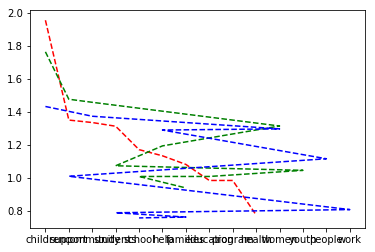

In [34]:
plt.plot(resultG[0], resultG[1], 'r--',resultN[0],resultN[1],'g--',resultC[0],resultC[1],'b--')


In [35]:
plt.show()

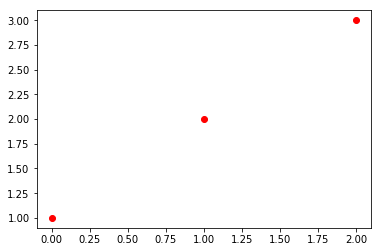

In [36]:
plt.plot([1,2,3],'ro')
plt.show()

In [37]:
vsorted_word_counts = sorted(list(word_counter_cero.values()), reverse=True)
plt.loglog(sorted_word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank");

NameError: name 'word_counter_cero' is not defined

In [ ]:
plt.hist(sorted_word_counts, bins=10);

In [ ]:
plt.hist(sorted_word_counts, bins=50, log=True);

In [ ]:
text_analysis(data_text_cero_donations)